In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Read the data from the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/titanic-tested.csv")

In [ ]:
# Select desired columns
selected_columns = ["Survived", "Pclass", "Gender", "Age", "SibSp", "Parch", "Embarked"]
df = df[selected_columns]

# Separate features and label
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# One-hot encode categorical features
categorical_features = ["Pclass", "Gender", "SibSp", "Parch", "Embarked"]
# Replace 'sparse' with 'sparse_output'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

In [ ]:
# Combine encoded features with numerical features (Age)
X_train = pd.concat([X_train.drop(categorical_features, axis=1), pd.DataFrame(encoded_train)], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), pd.DataFrame(encoded_test)], axis=1)

print(X_train.columns)

Index(['Age',     0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22],
      dtype='object')


In [ ]:
# Check for mixed data types in feature names (if needed)
if not all(isinstance(col, str) for col in X_train.columns):
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

In [ ]:
# Drop samples with missing values (optional, consider imputation if needed)
missing_rows = X_train.isna().any(axis=1)  # Check if any value is NaN in each row
X_train_filtered = X_train.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_train_filtered = y_train.loc[~missing_rows]  # Filter labels accordingly (optional)

missing_rows = X_test.isna().any(axis=1)  # Check if any value is NaN in each row
X_test_filtered = X_test.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_test_filtered = y_test.loc[~missing_rows]  # Filter labels accordingly (optional)

In [ ]:
# Standard scale the Age feature
scaler = StandardScaler()
scaler.fit(X_train_filtered[["Age"]])  # Fit only on filtered data (optional)
X_train_filtered.loc[:, "Age"] = scaler.transform(X_train_filtered[["Age"]])
X_test_filtered.loc[:, "Age"] = scaler.transform(X_test_filtered[["Age"]])  # Use the same scaler for testing data

In [ ]:
# Perform logistic regression (classification)
model = LogisticRegression()
model.fit(X_train_filtered, y_train_filtered)

LogisticRegression()

In [ ]:
# Make predictions on testing set
y_pred = model.predict(X_test_filtered)

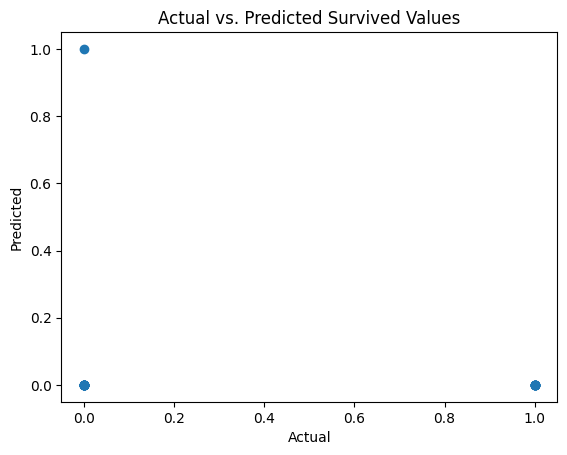

In [ ]:
# Actual vs Predicted Plot
plt.scatter(y_test_filtered, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Survived Values")
plt.show()

In [ ]:
# Calculate accuracy (using accuracy_score for classification)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix (for classification)
confusion_matrix = confusion_matrix(y_test_filtered, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)

Accuracy: 0.5909

Confusion Matrix:
[[13  1]
 [ 8  0]]
